In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_bfeature = pd.read_excel('03_train_bfeature.xlsx',index_col=0)
test_bfeature = pd.read_excel('03_test_bfeature.xlsx', index_col=0)

In [3]:
train_bfeature.head()

,ER,PR,HER,B,M,A1,A2,A3,B1,C1,...,J5,J6,BI-RADS 1,BI-RADS 2,BI-RADS 3,BI-RADS 4A,BI-RADS 4B,BI-RADS 4C,BI-RADS 5,BI-RADS 6
ID,,,,,,,,,,,,,,,,,,,,,
4664727,NaN,NaN,NaN,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4670551,NaN,NaN,NaN,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4603364,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4621837,NaN,NaN,NaN,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4633063,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [4]:
test_bfeature.head()

,ER,PR,HER,B,M,A1,A2,A3,B1,C1,...,J5,J6,BI-RADS 1,BI-RADS 2,BI-RADS 3,BI-RADS 4A,BI-RADS 4B,BI-RADS 4C,BI-RADS 5,BI-RADS 6
ID,,,,,,,,,,,,,,,,,,,,,
4531808,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4538756,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4539385,NaN,NaN,NaN,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4544634,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4547274,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [5]:
train_bfeature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2149 entries, 4664727 to 4578882
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ER          326 non-null    float64
 1   PR          322 non-null    float64
 2   HER         315 non-null    float64
 3   B           2149 non-null   int64  
 4   M           2149 non-null   int64  
 5   A1          2149 non-null   int64  
 6   A2          2149 non-null   int64  
 7   A3          2149 non-null   int64  
 8   B1          2149 non-null   int64  
 9   C1          2149 non-null   int64  
 10  D1          2149 non-null   int64  
 11  D2          2149 non-null   int64  
 12  D3          2149 non-null   int64  
 13  D4          2149 non-null   int64  
 14  E1          2149 non-null   int64  
 15  E2          2149 non-null   int64  
 16  E3          2149 non-null   int64  
 17  E4          2149 non-null   int64  
 18  E5          2149 non-null   int64  
 19  E6          2149 non-nu

In [6]:
test_bfeature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 4531808 to 4722524
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ER          69 non-null     float64
 1   PR          69 non-null     float64
 2   HER         68 non-null     float64
 3   B           537 non-null    int64  
 4   M           537 non-null    int64  
 5   A1          537 non-null    int64  
 6   A2          537 non-null    int64  
 7   A3          537 non-null    int64  
 8   B1          537 non-null    int64  
 9   C1          537 non-null    int64  
 10  D1          537 non-null    int64  
 11  D2          537 non-null    int64  
 12  D3          537 non-null    int64  
 13  D4          537 non-null    int64  
 14  E1          537 non-null    int64  
 15  E2          537 non-null    int64  
 16  E3          537 non-null    int64  
 17  E4          537 non-null    int64  
 18  E5          537 non-null    int64  
 19  E6          537 non

In [6]:
train_bfeature_ = train_bfeature.iloc[:,5:39]
train_bfeature_.head()

,A1,A2,A3,B1,C1,D1,D2,D3,D4,E1,...,H3,I1,I2,I3,J1,J2,J3,J4,J5,J6
ID,,,,,,,,,,,,,,,,,,,,,
4664727,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4670551,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4603364,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4621837,0,0,1,0,0,1,1,1,1,0,...,0,0,0,1,1,0,0,0,0,0
4633063,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [7]:
test_bfeature_ = test_bfeature.iloc[:,5:39]
test_bfeature_.head()

,A1,A2,A3,B1,C1,D1,D2,D3,D4,E1,...,H3,I1,I2,I3,J1,J2,J3,J4,J5,J6
ID,,,,,,,,,,,,,,,,,,,,,
4531808,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4538756,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4539385,0,0,1,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4544634,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4547274,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [8]:
train_target = train_bfeature.B
train_target.head()

ID
4664727    1
4670551    1
4603364    1
4621837    0
4633063    1
Name: B, dtype: int64

In [9]:
train_target.value_counts()

B
1    1654
0     495
Name: count, dtype: int64

In [10]:
test_target = test_bfeature.B
test_target.head()

ID
4531808    1
4538756    1
4539385    1
4544634    1
4547274    1
Name: B, dtype: int64

In [11]:
test_target.value_counts()

B
1    416
0    121
Name: count, dtype: int64

# Train the model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score

# LG

In [15]:
log = LogisticRegression(solver='newton-cg',random_state=99, penalty=None)

In [16]:
log.fit(train_bfeature_, train_target)

LogisticRegression(penalty=None, random_state=99, solver='newton-cg')

In [16]:
log.coef_

array([[ 0.70150862,  0.32357964,  0.06299893,  0.70270678,  0.4134669 ,
        -0.5329698 , -0.73368811, -0.71837811, -1.2030939 ,  0.35645428,
        -1.38801063, -2.39088253,  8.54125109, -2.20498219, -1.82574284,
         0.46747183,  0.21615763,  0.11225786,  0.29219986,  1.85560266,
         2.26171465,  1.40711058, -0.76751548, -9.42932476,  0.        ,
         0.62523658, -0.40221003,  0.29078044, -0.96533838, -1.98585735,
         0.07962173, -0.70456345,  0.        ,  1.41732722]])

In [17]:
log.intercept_

array([1.08808718])

In [18]:
log.score(train_bfeature_,train_target)

0.8334108887854816

In [19]:
log.score(test_bfeature_,test_target)

0.8175046554934823

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


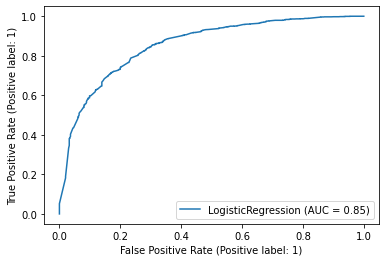

In [20]:
plot_roc_curve(log, train_bfeature_, train_target)
plt.savefig('04_b_log_train_auc.jpg')

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


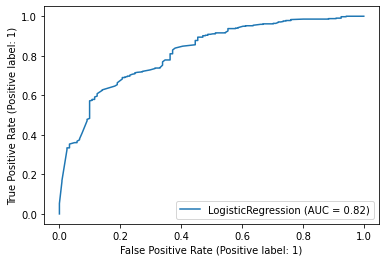

In [21]:
plot_roc_curve(log, test_bfeature_, test_target)
plt.savefig('04_b_log_test_auc.jpg')

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


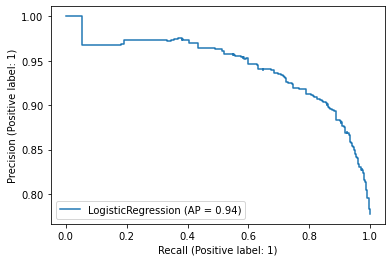

In [22]:
plot_precision_recall_curve(log, train_bfeature_, train_target)
plt.savefig('04_b_log_train_pr.jpg')

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


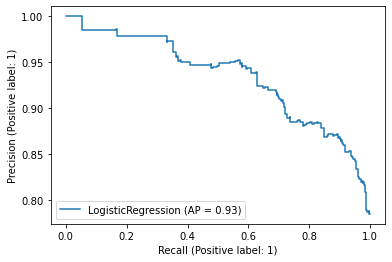

In [23]:
plot_precision_recall_curve(log, test_bfeature_, test_target)
plt.savefig('04_b_log_test_pr.jpg')

# Calibration curve

## BI-RADS 5

In [17]:
train_bfeature['BI-RADS 1'].value_counts()

BI-RADS 1
0    2148
1       1
Name: count, dtype: int64

In [18]:
train_bfeature['BI-RADS 1']==1

ID
4664727    False
4670551    False
4603364    False
4621837    False
4633063    False
           ...  
4703232    False
4687565    False
4597365    False
4656160    False
4578882    False
Name: BI-RADS 1, Length: 2149, dtype: bool

In [19]:
train_target[train_bfeature['BI-RADS 1']==1].value_counts()

B
1    1
Name: count, dtype: int64

In [20]:
test_bfeature['BI-RADS 1'].value_counts()

BI-RADS 1
0    537
Name: count, dtype: int64

In [21]:
test_bfeature['BI-RADS 1']==1

ID
4531808    False
4538756    False
4539385    False
4544634    False
4547274    False
           ...  
4720805    False
4721612    False
4721952    False
4722521    False
4722524    False
Name: BI-RADS 1, Length: 537, dtype: bool

In [29]:
test_target[test_bfeature['BI-RADS 1']==1].value_counts()

Series([], Name: B, dtype: int64)

##  BI-RADS 6

In [22]:
train_bfeature['BI-RADS 6'].value_counts()

BI-RADS 6
0    2149
Name: count, dtype: int64

In [23]:
train_bfeature['BI-RADS 6']==1

ID
4664727    False
4670551    False
4603364    False
4621837    False
4633063    False
           ...  
4703232    False
4687565    False
4597365    False
4656160    False
4578882    False
Name: BI-RADS 6, Length: 2149, dtype: bool

In [24]:
train_bfeature['BI-RADS 6'].sum()

0

In [25]:
test_bfeature['BI-RADS 6'].value_counts()

BI-RADS 6
0    537
Name: count, dtype: int64

In [26]:
test_bfeature['BI-RADS 6']==1

ID
4531808    False
4538756    False
4539385    False
4544634    False
4547274    False
           ...  
4720805    False
4721612    False
4721952    False
4722521    False
4722524    False
Name: BI-RADS 6, Length: 537, dtype: bool

In [27]:
test_target[test_bfeature['BI-RADS 6']==1].value_counts()

Series([], Name: count, dtype: int64)

## Loop

### Basic statistics

In [28]:
bi_rads = ['BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4A', 'BI-RADS 4B', 'BI-RADS 4C' ,'BI-RADS 5']

In [29]:
bi_counts = pd.DataFrame()
bi_B_counts = pd.DataFrame()

for bi in bi_rads:
    bi_counts_ = train_bfeature[bi].value_counts()
    bi_B_counts_ = train_target[train_bfeature[bi]==1].value_counts()
    bi_counts = pd.concat((bi_counts,bi_counts_), axis=1)
    bi_B_counts = pd.concat((bi_B_counts,bi_B_counts_), axis=1)

In [30]:
bi_counts

,count,count,count,count,count,count
0,2088,1520,1419,1773,1915,2031
1,61,629,730,376,234,118


In [31]:
bi_B_counts

,count,count,count,count,count,count
1,59,607,631,250,89,17
0,2,22,99,126,145,101


In [32]:
bi_counts = pd.DataFrame()
bi_B_counts = pd.DataFrame()

for bi in bi_rads:
    bi_counts_ = test_bfeature[bi].value_counts()
    bi_B_counts_ = test_target[test_bfeature[bi]==1].value_counts()
    bi_counts = pd.concat((bi_counts,bi_counts_), axis=1)
    bi_B_counts = pd.concat((bi_B_counts,bi_B_counts_), axis=1)

In [33]:
bi_counts

,count,count,count,count,count,count
0,522,393,357,440,468,505
1,15,144,180,97,69,32


In [34]:
 bi_B_counts

,count,count,count,count,count,count
1,15.0,137,158,67,35,4
0,NaN,7,22,30,34,28


### Calibration curve

In [35]:
bi_rads = ['BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4A', 'BI-RADS 4B', 'BI-RADS 4C' ,'BI-RADS 5']

In [41]:

def proportion_ci(p, n, z=1.96):
    se = np.sqrt(p * (1 - p) / n) if n > 0 else 0
    lower = max(0, p - z * se)
    upper = min(1, p + z * se)
    return round(lower, 3), round(upper, 3)

In [36]:
score = pd.DataFrame()
re = pd.DataFrame()
train_counts = []
test_counts = []
for bi in bi_rads:
  
    train_bi_total = train_bfeature[bi].sum()
    train_true_sum = train_target[train_bfeature[bi]==1].sum()
    train_true_proba = train_true_sum / train_bi_total
  
    train_pre_sum = log.predict(train_bfeature_[train_bfeature[bi]==1]).sum()
    train_pre_proba = train_pre_sum / train_bi_total
  
    train_sc = accuracy_score(train_target[train_bfeature[bi]==1],log.predict(train_bfeature_[train_bfeature[bi]==1]))
    
    
  
    test_bi_total = test_bfeature[bi].sum()
    test_true_sum = test_target[test_bfeature[bi]==1].sum()
    test_true_proba = test_true_sum / test_bi_total
      
    test_pre_sum = log.predict(test_bfeature_[test_bfeature[bi]==1]).sum()
    test_pre_proba = test_pre_sum / test_bi_total
   
    test_sc = accuracy_score(test_target[test_bfeature[bi]==1],log.predict(test_bfeature_[test_bfeature[bi]==1]))

    score_ = pd.DataFrame((train_sc, test_sc))
    score = pd.concat((score, score_.T))
    
    re_ = pd.DataFrame((train_true_proba, train_pre_proba, test_true_proba, test_pre_proba))
    re = pd.concat((re, re_.T))

In [42]:
score = pd.DataFrame()
re = pd.DataFrame()
train_counts = []
test_counts = []
for bi in bi_rads:
   
    train_mask = train_bfeature[bi] == 1
    test_mask = test_bfeature[bi] == 1

  
    train_bi_total = train_mask.sum()
    test_bi_total = test_mask.sum()
    train_counts.append(train_bi_total)
    test_counts.append(test_bi_total)

  
    train_y_true = train_target[train_mask]
    train_y_pred = log.predict(train_bfeature_[train_mask])
    train_sc = accuracy_score(train_y_true, train_y_pred)
    train_true_proba = train_y_true.sum() / train_bi_total
    train_pre_proba = train_y_pred.sum() / train_bi_total

   
    test_y_true = test_target[test_mask]
    test_y_pred = log.predict(test_bfeature_[test_mask])
    test_sc = accuracy_score(test_y_true, test_y_pred)
    test_true_proba = test_y_true.sum() / test_bi_total
    test_pre_proba = test_y_pred.sum() / test_bi_total

    
    score = pd.concat((score, pd.DataFrame([[train_sc, test_sc]])), ignore_index=True)

    
    re = pd.concat((re, pd.DataFrame([[train_true_proba, train_pre_proba, test_true_proba, test_pre_proba]])),
                   ignore_index=True)


score.columns = ['Train Accuracy', 'Test Accuracy']


train_ci = [proportion_ci(p, n) for p, n in zip(score['Train Accuracy'], train_counts)]
test_ci = [proportion_ci(p, n) for p, n in zip(score['Test Accuracy'], test_counts)]


score['Train CI Lower'] = [ci[0] for ci in train_ci]
score['Train CI Upper'] = [ci[1] for ci in train_ci]
score['Test CI Lower'] = [ci[0] for ci in test_ci]
score['Test CI Upper'] = [ci[1] for ci in test_ci]
score['BI-RADS'] = bi_rads


score = score[['BI-RADS', 'Train Accuracy', 'Train CI Lower', 'Train CI Upper',
               'Test Accuracy', 'Test CI Lower', 'Test CI Upper']]

In [43]:
score

,BI-RADS,Train Accuracy,Train CI Lower,Train CI Upper,Test Accuracy,Test CI Lower,Test CI Upper
0,BI-RADS 2,0.983607,0.952,1.000,1.000000,1.000,1.000
1,BI-RADS 3,0.965024,0.951,0.979,0.951389,0.916,0.987
2,BI-RADS 4A,0.865753,0.841,0.890,0.877778,0.830,0.926
3,BI-RADS 4B,0.678191,0.631,0.725,0.649485,0.555,0.744
4,BI-RADS 4C,0.598291,0.535,0.661,0.536232,0.419,0.654
5,BI-RADS 5,0.813559,0.743,0.884,0.906250,0.805,1.000


In [37]:
train_sc

0.8135593220338984

In [38]:
test_sc

0.90625

In [39]:
score_

,0
0,0.813559
1,0.906250


In [40]:
score

,0,1
0,0.983607,1.000000
0,0.965024,0.951389
0,0.865753,0.877778
0,0.678191,0.649485
0,0.598291,0.536232
0,0.813559,0.906250


In [49]:
re.index=['BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4A', 'BI-RADS 4B', 'BI-RADS 4C' ,'BI-RADS 5']

In [50]:
re.columns=['train_true_proba', 'train_pre_proba', 'test_true_proba', 'test_pre_proba']

In [51]:
re

,train_true_proba,train_pre_proba,test_true_proba,test_pre_proba
BI-RADS 2,0.967213,0.983607,1.000000,1.000000
BI-RADS 3,0.965024,1.000000,0.951389,1.000000
BI-RADS 4A,0.864384,0.995890,0.877778,1.000000
BI-RADS 4B,0.664894,0.832447,0.690722,0.814433
BI-RADS 4C,0.380342,0.346154,0.507246,0.246377
BI-RADS 5,0.144068,0.042373,0.125000,0.031250


In [52]:
re_ = 1-re
re_

,train_true_proba,train_pre_proba,test_true_proba,test_pre_proba
BI-RADS 2,0.032787,0.016393,0.000000,0.000000
BI-RADS 3,0.034976,0.000000,0.048611,0.000000
BI-RADS 4A,0.135616,0.004110,0.122222,0.000000
BI-RADS 4B,0.335106,0.167553,0.309278,0.185567
BI-RADS 4C,0.619658,0.653846,0.492754,0.753623
BI-RADS 5,0.855932,0.957627,0.875000,0.968750


In [53]:
train_proba = re_.iloc[:,:2].stack().reset_index()
train_proba.columns=['BI-RADS','DATA','PROBA']
train_proba

,BI-RADS,DATA,PROBA
0,BI-RADS 2,train_true_proba,0.032787
1,BI-RADS 2,train_pre_proba,0.016393
2,BI-RADS 3,train_true_proba,0.034976
3,BI-RADS 3,train_pre_proba,0.000000
4,BI-RADS 4A,train_true_proba,0.135616
5,BI-RADS 4A,train_pre_proba,0.004110
6,BI-RADS 4B,train_true_proba,0.335106
7,BI-RADS 4B,train_pre_proba,0.167553
8,BI-RADS 4C,train_true_proba,0.619658
9,BI-RADS 4C,train_pre_proba,0.653846


In [54]:
sns.set_theme(style="white", context='paper')

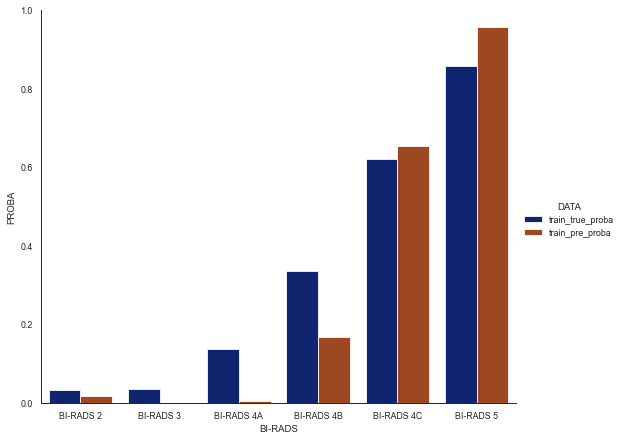

In [55]:
fig = sns.catplot(data=train_proba, kind="bar", x="BI-RADS", y="PROBA", hue="DATA",ci="sd", palette="dark", height=6, aspect=1.2)
fig.set(ylim=(0,1))
plt.savefig('04_b_train_cal.jpg')

In [56]:
test_proba = re_.iloc[:,2:].stack().reset_index()
test_proba.columns=['BI-RADS','DATA','PROBA']
test_proba

,BI-RADS,DATA,PROBA
0,BI-RADS 2,test_true_proba,0.000000
1,BI-RADS 2,test_pre_proba,0.000000
2,BI-RADS 3,test_true_proba,0.048611
3,BI-RADS 3,test_pre_proba,0.000000
4,BI-RADS 4A,test_true_proba,0.122222
5,BI-RADS 4A,test_pre_proba,0.000000
6,BI-RADS 4B,test_true_proba,0.309278
7,BI-RADS 4B,test_pre_proba,0.185567
8,BI-RADS 4C,test_true_proba,0.492754
9,BI-RADS 4C,test_pre_proba,0.753623


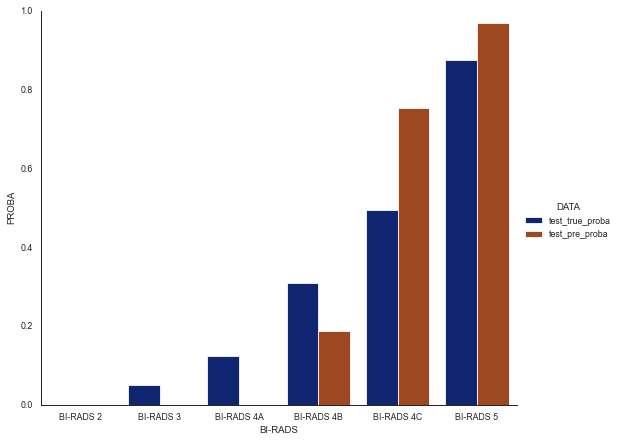

In [57]:
fig = sns.catplot(data=test_proba, kind="bar", x="BI-RADS", y="PROBA", hue="DATA",ci="sd", palette="dark", height=6, aspect=1.2)
fig.set(ylim=(0,1))
plt.savefig('04_b_test_cal.jpg')